In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from backtest_functions_v3 import *

In [2]:
df = pd.read_parquet("../data/5b.PROD_cryptonews_hourly.parquet")
df.index = pd.to_datetime(df.index)
df.tail()

,news_count,tanalysis_absa,economy_absa,regulation_absa,technology_absa,adoption_absa,cybersecurity_absa
date,,,,,,,
2024-12-31 19:00:00,6,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-31 20:00:00,6,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-31 21:00:00,3,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-31 22:00:00,4,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-31 23:00:00,4,NaN,NaN,NaN,NaN,NaN,NaN


Overall Annual Return: 66.65%
Overall Annual Sharpe Ratio: 2.9043
Maximum Drawdown: -14.8 %
Win/Loss Ratio: 1.2301
Alpha: 0.9128
Beta: 0.0381

Yearly Metrics:
   year  yearly_return  yearly_std  yearly_beta  yearly_alpha  yearly_sharpe
0  2021       1.201297    0.296710     0.072290      1.149653       4.048718
1  2022       0.681081    0.240330    -0.235224      0.478662       2.833941
2  2023       0.355950    0.167588     0.173856      0.170993       2.123956
3  2024       0.429970    0.190209     0.220806      0.229365       2.260514


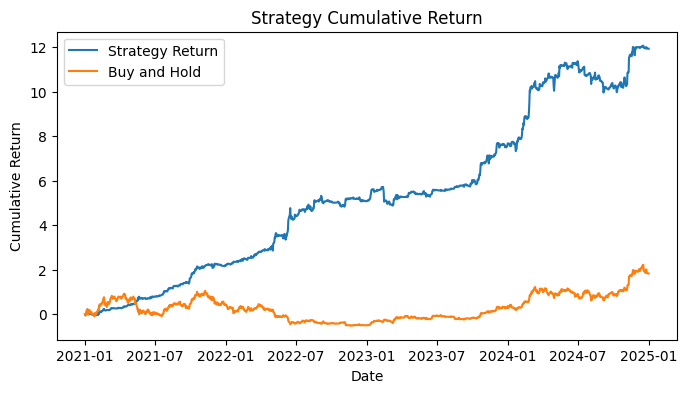

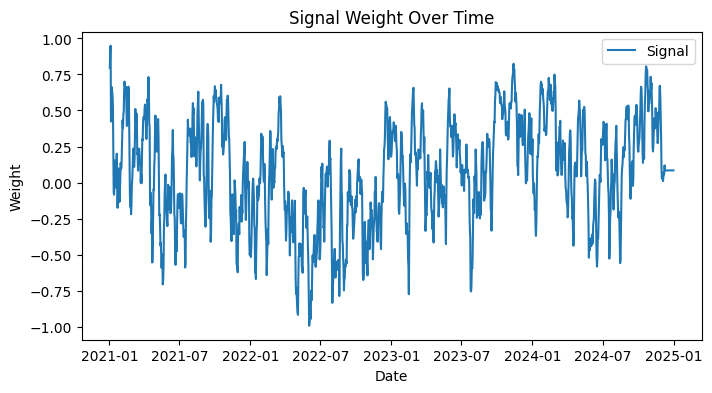

In [3]:
# signal smoothing
df['signal'] = df['tanalysis_absa'].ewm(span=100).mean()

# signal scaling
scaler = MinMaxScaler(feature_range=(-1, 1))
df['signal'] = scaler.fit_transform(df['signal'].values.reshape(-1, 1))

run_backtest(df)